In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
meteo   = pd.read_csv("meteo-nogal-09.csv", engine = "python")
suelo   = pd.read_csv("soil-nogal-09.csv", engine = "python")

In [3]:
meteo.tail(3)

,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
52636,03/01/2010,08:40:00,914.0,0.851,1.321,-0.141,10.38,1563,76.34,NAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52637,03/01/2010,08:50:00,915.0,0.757,1.295,-0.094,11.25,1564,97.7,NAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52638,03/01/2010,09:00:00,916.0,0.584,0.75,-0.025,12.03,1564,120.1,871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
suelo.tail()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_20cm.1,THETA_30cm.1,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1
17477,148,2009,365,2200,0.944,0.950,0.977,0.992,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17478,148,2009,365,2230,0.944,0.951,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17479,148,2009,365,2300,0.944,0.952,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17480,148,2009,365,2330,0.944,0.952,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17481,148,2009,365,2400,0.943,0.953,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Eliminando datos innecesarios de "meteo"
none = []
for m in range(0, len(meteo.columns)):
    if(re.search("^Unnamed", meteo.columns[m]) != None):
        none.append(meteo.columns[m])
meteo = meteo.drop(none,1)
meteo = meteo.drop(0,0)
meteo["Date"] = pd.to_datetime(meteo.DATE, dayfirst=True)
meteo = meteo.drop("DATE",1)
meteo["Year"] = meteo["Date"].dt.year
meteo["Month"] = meteo["Date"].dt.month
meteo["Day"] = meteo["Date"].dt.day
meteo1 = pd.DataFrame(meteo[meteo["Date"] <= "2009-12-31"])
meteo1.head()

,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Date,Year,Month,Day
1,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,2009-01-01,2009.0,1.0,1.0
2,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,2009-01-01,2009.0,1.0,1.0
3,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01,2009.0,1.0,1.0
4,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,2009-01-01,2009.0,1.0,1.0
5,00:50,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,2009-01-01,2009.0,1.0,1.0


In [6]:
#Utilizando las columnas necesarias de "suelo"
#2 Year_RTM  L
#3 Day_RTM  L
#4 Hour_Minute_RTM  L
suelo1 = pd.DataFrame()
suelo1["Tsuelo_10cm"] = suelo["Tsuelo_10cm"]
suelo1["Tsuelo_20cm"] = suelo["Tsuelo_20cm"]
suelo1["Tsuelo_40cm"] = suelo["Tsuelo_40cm"]
suelo1["Tsuelo_85cm"] = suelo["Tsuelo_85cm"]
suelo1["Year"] = suelo["2 Year_RTM  L"]
suelo1["Day"] = suelo["3 Day_RTM  L"]
suelo1["Hour"] = suelo["4 Hour_Minute_RTM  L"]
suelo1.head()

,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_40cm,Tsuelo_85cm,Year,Day,Hour
0,14.36,14.70,15.52,17.75,2009,1,30
1,14.33,14.70,15.52,17.75,2009,1,100
2,14.28,14.69,15.54,17.74,2009,1,130
3,14.24,14.69,15.55,17.74,2009,1,200
4,14.19,14.69,15.55,17.73,2009,1,230


In [7]:
meteo1.head(3)
#meteo1["airT_Avg"]

,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Date,Year,Month,Day
1,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,2009-01-01,2009.0,1.0,1.0
2,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,2009-01-01,2009.0,1.0,1.0
3,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01,2009.0,1.0,1.0


In [8]:
meteo1.dtypes

TIME                   object
u_Avg                  object
v_Avg                  object
w_Avg                  object
t_Avg                  object
kh20_Avg               object
net_rad_Avg            object
shf1_Avg               object
shf2_Avg               object
vv_Avg                 object
airT_Avg               object
rh_Avg                float64
e_sat_Avg              object
e_Avg                  object
h2o_hmp_Avg            object
Date           datetime64[ns]
Year                  float64
Month                 float64
Day                   float64
dtype: object

In [9]:
Date0 = meteo1["TIME"]
Date1 = meteo1["Date"]
meteo1[meteo1.columns] = meteo[meteo.columns].apply(pd.to_numeric, errors = "coerce")
meteo1["TIME"] = Date0
meteo1["Date"] = Date1
meteo1.dtypes

TIME                   object
u_Avg                 float64
v_Avg                 float64
w_Avg                 float64
t_Avg                 float64
kh20_Avg              float64
net_rad_Avg           float64
shf1_Avg              float64
shf2_Avg              float64
vv_Avg                float64
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
Date           datetime64[ns]
Year                  float64
Month                 float64
Day                   float64
dtype: object

In [10]:
meteo1.head(1)

,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Date,Year,Month,Day
1,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,2009-01-01,2009.0,1.0,1.0


In [11]:
#Obteniendo los datos para graficar el primer inciso
#Para que la graficación de las temperaturas del aire que son cada 10 min coincidan con las de del suelo
    #que son cada 30 min
Graf = pd.DataFrame()
TempAire  = []
Time = []
Date = []

for i in range(3,145,3):
    TempAire.append(meteo1["airT_Avg"][i])
    Time.append(meteo1["TIME"][i])
    Date.append(meteo1["Date"][i])
Graf["TempAire"] = TempAire
Graf["Time"] = Time
Graf["DATE"] = Date
Graf.head()

,TempAire,Time,DATE
0,9.059999,00:30,2009-01-01
1,8.340000,01:00,2009-01-01
2,7.539001,01:30,2009-01-01
3,6.760000,02:00,2009-01-01
4,7.288001,02:30,2009-01-01


In [12]:
#Llenando los datos para graficar de la temperatura del suelo
Tsuelo10 = []
Tsuelo20 = []
Tsuelo40 = []
Tsuelo85 = []
Hour = []
for i in range(0,48):
    Tsuelo10.append(suelo1["Tsuelo_10cm"][i])
    Tsuelo20.append(suelo1["Tsuelo_20cm"][i])
    Tsuelo40.append(suelo1["Tsuelo_40cm"][i])
    Tsuelo85.append(suelo1["Tsuelo_85cm"][i])
    Hour.append(suelo1["Hour"][i])
Graf["Tsuelo10"] = Tsuelo10
Graf["Tsuelo20"] = Tsuelo20
Graf["Tsuelo40"] = Tsuelo40
Graf["Tsuelo85"] = Tsuelo85
Graf["Hour"] = Hour
Graf.head(1)

,TempAire,Time,DATE,Tsuelo10,Tsuelo20,Tsuelo40,Tsuelo85,Hour
0,9.059999,00:30,2009-01-01,14.36,14.7,15.52,17.75,30


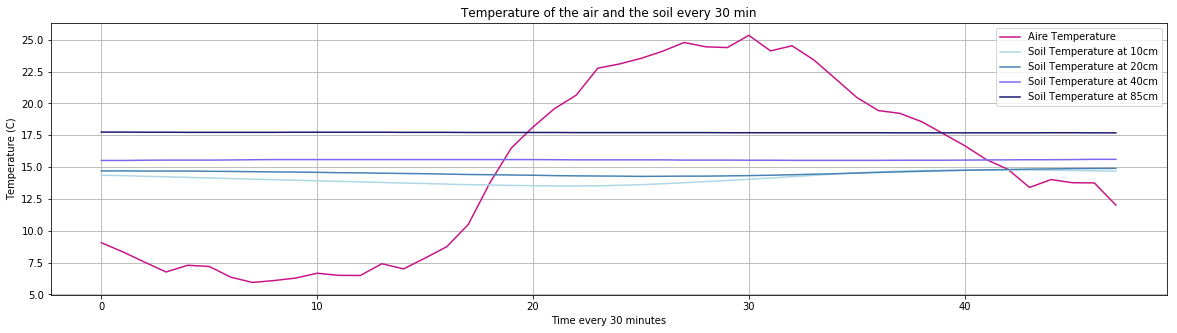

In [13]:
plt.figure(figsize=(20,5))
plt.plot(Graf["TempAire"], label="Aire Temperature", color = "mediumvioletred")
plt.xlabel("Time every 30 minutes")
plt.ylabel("Temperature (C)")
plt.grid()

plt.plot(Graf["Tsuelo10"], label = "Soil Temperature at 10cm", color = "lightblue")
plt.plot(Graf["Tsuelo20"], label = "Soil Temperature at 20cm", color = "steelblue")
plt.plot(Graf["Tsuelo40"], label = "Soil Temperature at 40cm", color = "mediumslateblue")
plt.plot(Graf["Tsuelo85"], label = "Soil Temperature at 85cm", color = "midnightblue")
plt.legend()
plt.title("Temperature of the air and the soil every 30 min")
plt.savefig("grafica_1",plt=2000)
plt.show()

In [14]:
meteo1.tail()

,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Date,Year,Month,Day
52333,23:10:00,0.736,-0.135,12.49,1050.0,-76.38,NaN,NaN,2.595,12.82,0.482,1.480,0.713,5.405,NaN,2009-12-31,2009.0,12.0,31.0
52334,23:20:00,0.711,-0.106,12.24,1047.0,-75.03,NaN,NaN,2.517,12.62,0.489,1.460,0.714,5.416,NaN,2009-12-31,2009.0,12.0,31.0
52335,23:30:00,0.746,-0.116,11.90,1043.0,-74.88,NaN,NaN,2.380,12.30,0.500,1.430,0.715,5.428,NaN,2009-12-31,2009.0,12.0,31.0
52336,23:40:00,0.641,-0.084,11.53,1054.0,-71.33,NaN,NaN,2.182,11.88,0.509,1.391,0.708,5.383,NaN,2009-12-31,2009.0,12.0,31.0
52337,23:50:00,0.538,-0.075,11.31,1064.0,-69.40,NaN,NaN,2.102,11.54,0.516,1.360,0.701,5.338,NaN,2009-12-31,2009.0,12.0,31.0


In [15]:
#Datos meteorológicos para meterlos en un dataframe solo y luego graficar
meteo1["TMean"] = (meteo1.groupby(["Year", "Month", "Day"])["airT_Avg"].transform(np.mean))
meteo1["TMax"] = (meteo1.groupby(["Year", "Month", "Day"])["airT_Avg"].transform(np.max))
meteo1["TMin"] = (meteo1.groupby(["Year", "Month", "Day"])["airT_Avg"].transform(np.min))
#meteo1["Day"]

In [16]:
#Eliminando duplicados para que todo quede dirario
meteo1 = meteo1.drop_duplicates(subset=[ "Month", "Year", "Day"])
meteo1 = meteo1.reset_index(drop=True)
meteo1.tail()


,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,...,e_sat_Avg,e_Avg,h2o_hmp_Avg,Date,Year,Month,Day,TMean,TMax,TMin
359,14:50:00,-0.869,0.142,18.82,114.8,206.00,NaN,NaN,1.508,21.05,...,0.354,2.604,NaN,2009-12-27,2009.0,12.0,27.0,0.304227,0.584,0.135
360,00:00:00,0.016,-0.029,10.77,1791.0,-48.01,NaN,NaN,1.435,10.66,...,0.591,4.515,NaN,2009-12-28,2009.0,12.0,28.0,0.375285,0.593,0.136
361,00:00:00,-0.777,0.005,10.87,1249.0,-55.64,NaN,NaN,1.154,10.36,...,0.748,5.718,NaN,2009-12-29,2009.0,12.0,29.0,0.521458,0.776,0.224
362,00:00:00,0.872,-0.126,9.65,1148.0,-57.72,NaN,NaN,1.675,9.05,...,0.735,5.643,NaN,2009-12-30,2009.0,12.0,30.0,0.431569,0.666,0.193
363,00:00:00,0.503,-0.043,11.03,1289.0,-56.06,NaN,NaN,1.608,10.63,...,0.627,4.789,NaN,2009-12-31,2009.0,12.0,31.0,0.373306,0.547,0.141


In [17]:
suelo1.head(3)

,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_40cm,Tsuelo_85cm,Year,Day,Hour
0,14.36,14.70,15.52,17.75,2009,1,30
1,14.33,14.70,15.52,17.75,2009,1,100
2,14.28,14.69,15.54,17.74,2009,1,130


In [18]:
#Obtener los datos de temperatura promedio diaria, máxima y mínima de los suelos a diferentes alturas
#Para una profundidad de 10cm
suelo1["TMean10cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_10cm"].transform(np.mean))
suelo1["TMax10cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_10cm"].transform(np.max))
suelo1["TMin10cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_10cm"].transform(np.min))
#Para una profundidad de 20cm
suelo1["TMean20cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_20cm"].transform(np.mean))
suelo1["TMax20cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_20cm"].transform(np.max))
suelo1["TMin20cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_20cm"].transform(np.min))
#Para una profundidad de 40cm
suelo1["TMean40cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_40cm"].transform(np.mean))
suelo1["TMax40cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_40cm"].transform(np.max))
suelo1["TMin40cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_40cm"].transform(np.min))
#Para una profundidad de 85cm
suelo1["TMean20cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_85cm"].transform(np.mean))
suelo1["TMax20cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_85cm"].transform(np.max))
suelo1["TMin20cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_85cm"].transform(np.min))

#Eliminando duplicados para que todo quede dirario
suelo2 = suelo1.drop_duplicates(subset=["Year", "Day"])
suelo2 = suelo2.reset_index(drop=True)
suelo2.tail()

,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_40cm,Tsuelo_85cm,Year,Day,Hour,TMean10cm,TMax10cm,TMin10cm,TMean20cm,TMax20cm,TMin20cm,TMean40cm,TMax40cm,TMin40cm
360,13.22,13.72,15.43,17.75,2009,361,1730,13.355714,13.40,13.22,17.738571,17.76,17.72,15.415714,15.44,15.40
361,13.37,13.91,15.40,17.71,2009,362,30,13.301042,13.69,13.00,17.634167,17.71,17.57,15.347500,15.40,15.30
362,13.69,14.03,15.31,17.57,2009,363,30,13.453125,13.74,13.06,17.494375,17.57,17.44,15.323542,15.36,15.28
363,13.65,14.05,15.31,17.44,2009,364,30,13.393750,13.78,12.96,17.390625,17.44,17.34,15.277292,15.32,15.22
364,13.71,14.06,15.24,17.35,2009,365,30,13.527292,13.96,13.11,17.297917,17.35,17.26,15.246250,15.28,15.20


In [19]:
# for i in range(0,len(meteo2)):
#     print(meteo2["Day"][i])
#     if(meteo2["Day"][i+1]==meteo2["Day"][i]+1):
#         continue
#     elif(meteo2["Day"][i+1] != meteo2["Day"][i]+1):
#         print("aaaa",i)
        

In [20]:
#Falta un día!!!!!!!!
for i in range(292,296):
    print(i,meteo2["Day"][i])

NameError: name 'meteo2' is not defined

In [ ]:
meteo1["airT_Avg"]